# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)
btc_data = btc_response_data.json()
    
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
btc_price

# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_data = eth_response_data.json()
    
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43533.60
The current value of your 5.3 ETH is $13761.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-28", tz = "America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
portfolio.index = portfolio.index.date

# Preview DataFrame
portfolio.head()

AGG                                     SPY                  \
              open    high    low   close   volume    open    high     low   
2021-05-28  114.55  114.68  114.5  114.51  6186451  420.97  421.25  419.79   

                              
             close    volume  
2021-05-28  420.02  49200328

In [9]:
# Pick AGG and SPY close prices
agg_close_price = portfolio["AGG"]["close"].item()
spy_close_price = portfolio["SPY"]["close"].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.51
Current SPY closing price: $420.02


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21001.00
The current value of your 200 AGG shares is $22902.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Display savings DataFrame
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])
df_savings

,amount
crypto,57294.838
shares,43903.000


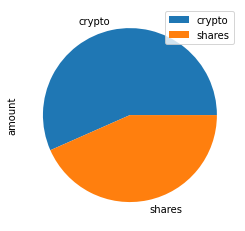

In [12]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', subplots = True);


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-28').isoformat()
end_date = pd.Timestamp('2021-05-28').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data

AGG                                           SPY          \
              open      high       low    close   volume    open    high   
2021-01-07  117.13  117.2600  117.0667  117.210  4949593  376.10  379.90   
2021-01-08  117.18  117.3428  116.9800  117.090  5580443  380.59  381.49   
2021-01-11  117.02  117.0500  116.8900  116.890  5047096  377.85  380.58   
2021-01-12  116.82  116.9900  116.6800  116.980  5103382  378.89  379.86   
2021-01-13  117.63  117.6300  117.0800  117.360  5686592  378.69  380.86   
...            ...       ...       ...      ...      ...     ...     ...   
2021-05-25  114.58  114.7500  114.5600  114.740  3239766  420.33  420.71   
2021-05-26  114.13  114.8000  114.1300  114.690  3377324  418.87  419.61   
2021-05-27  114.61  114.6200  114.4500  114.545  4826895  420.17  420.72   
2021-05-28  114.55  114.6800  114.5000  114.510  6186451  420.97  421.25   
2021-06-01  114.40  114.4000  114.1640  114.340  5655159  422.57  422.72   

                                        
                 low   close    volume  
2021-01-07  375.9100  379.06  58862006  
2021-01-08  377.1000  381.24  60275466  
2021-01-11  377.7189  378.74  44814805  
2021-01-12  376.3600  378.81  45364896  
2021-01-13  377.8500  379.76  38355050  
...              ...     ...       ...  
2021-05-25  417.6200  418.25  50976654  
2021-05-26  417.7600  419.04  38369865  
2021-05-27  418.9851  419.69  48411613  
2021-05-28  419.7900  420.02  49200328  
2021-06-01  419.2000  419.63  47607950  

[100 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_dist = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
mc_dist.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-07  117.13  117.2600  117.0667  117.21  4949593          NaN  376.10   
2021-01-08  117.18  117.3428  116.9800  117.09  5580443    -0.001024  380.59   
2021-01-11  117.02  117.0500  116.8900  116.89  5047096    -0.001708  377.85   
2021-01-12  116.82  116.9900  116.6800  116.98  5103382     0.000770  378.89   
2021-01-13  117.63  117.6300  117.0800  117.36  5686592     0.003248  378.69   

                                                             
              high       low   close    volume daily_return  
2021-01-07  379.90  375.9100  379.06  58862006          NaN  
2021-01-08  381.49  377.1000  381.24  60275466     0.005751  
2021-01-11  380.58  377.7189  378.74  44814805    -0.006558  
2021-01-12  379.86  376.3600  378.81  45364896     0.000185  
2021-01-13  380.86  377.8500  379.76  38355050     0.002508

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012713,1.009498,1.000936,1.004497,0.997637,1.003327,1.003652,1.004392,0.997692,1.006961,...,1.001964,1.001459,0.994462,0.995665,1.001886,1.003108,1.007644,0.998327,0.991560,0.996252
2,1.010621,1.017350,1.002787,1.008213,1.006460,0.995978,1.003620,1.003424,0.998507,1.003245,...,0.999304,1.004880,0.993608,0.990434,1.007358,1.005908,1.008598,0.994442,0.984772,0.992603
3,1.013285,1.021485,1.000994,1.007334,1.001621,1.000286,0.994019,1.001086,1.001953,1.006541,...,1.004884,0.999592,0.990499,0.998512,0.999913,1.007693,1.011640,0.989409,0.985772,0.993606
4,1.019378,1.024451,1.000566,1.008002,1.000752,1.002239,0.997064,0.992530,1.004270,1.009776,...,1.006002,0.989642,0.997934,1.002933,1.004677,1.010887,1.008014,0.998004,0.990679,1.000503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,94.127197,24.591316,70.671164,30.923718,49.936815,73.934806,88.372505,45.864540,48.377838,79.168944,...,76.200058,53.386755,46.106248,45.539333,51.983333,60.631436,22.349704,64.150822,30.040913,47.611934
7557,94.015641,24.733054,70.375188,31.126299,49.748773,74.024107,88.522211,45.815178,48.385059,79.840658,...,76.409951,53.597501,46.506264,45.546786,52.296351,59.982070,22.392015,64.782346,29.847766,47.649323
7558,94.089488,24.697526,70.179455,31.242190,49.695302,73.768104,87.700633,46.129539,47.989085,80.999534,...,76.201432,53.850939,46.344143,46.006152,52.548176,59.692681,22.192291,65.484944,30.032305,47.731281
7559,93.641618,24.576181,70.454349,31.043977,49.343721,73.819762,88.394591,46.284856,48.172281,81.384579,...,75.977185,54.183749,46.103762,45.961881,52.228087,59.597912,22.464190,65.985804,30.327819,47.507505


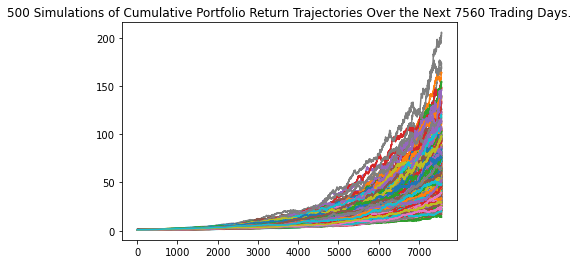

In [19]:
# Plot simulation outcomes
mc_line_plot = mc_dist.plot_simulation()

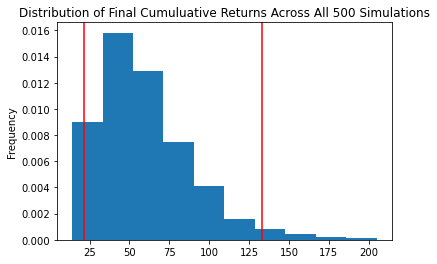

In [20]:
# Plot probability distribution and confidence intervals
mc_dist_plot = mc_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = mc_dist.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean             59.261545
std              29.033170
min              14.060105
25%              38.244732
50%              53.005424
75%              74.713969
max             204.914571
95% CI Lower     21.368453
95% CI Upper    133.174301
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary[8] * 20000, 2)
ci_upper = round(mc_summary[9] * 20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $427369.06 and $2663486.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary[8] * 30000, 2)
ci_upper = round(mc_summary[9] * 30000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $641053.59 and $3995229.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_dist_five = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*5
)
mc_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-07  117.13  117.2600  117.0667  117.21  4949593          NaN  376.10   
2021-01-08  117.18  117.3428  116.9800  117.09  5580443    -0.001024  380.59   
2021-01-11  117.02  117.0500  116.8900  116.89  5047096    -0.001708  377.85   
2021-01-12  116.82  116.9900  116.6800  116.98  5103382     0.000770  378.89   
2021-01-13  117.63  117.6300  117.0800  117.36  5686592     0.003248  378.69   

                                                             
              high       low   close    volume daily_return  
2021-01-07  379.90  375.9100  379.06  58862006          NaN  
2021-01-08  381.49  377.1000  381.24  60275466     0.005751  
2021-01-11  380.58  377.7189  378.74  44814805    -0.006558  
2021-01-12  379.86  376.3600  378.81  45364896     0.000185  
2021-01-13  380.86  377.8500  379.76  38355050     0.002508

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002998,1.010543,1.001852,1.000318,1.000087,1.002604,1.011276,1.001558,0.999452,1.003454,...,0.992284,1.004755,1.003963,1.002034,1.003583,1.000839,1.002096,0.995778,1.004381,0.996788
2,1.001925,1.012127,1.005036,1.003858,1.006418,1.004021,1.014199,1.001825,1.001945,1.007385,...,0.989948,0.999590,1.008111,1.004004,1.002961,0.998491,0.994996,0.990585,1.000023,0.998913
3,1.009161,1.013826,1.001233,1.009616,1.000686,1.010269,1.008399,1.008591,0.998806,1.007559,...,0.986853,0.998669,1.006473,1.005152,1.004346,0.992891,0.997606,1.001212,1.004306,0.997508
4,1.005442,1.019043,0.998639,1.008043,1.008692,1.017280,1.001452,1.008061,0.990913,1.009987,...,0.983062,0.995640,1.004530,1.004681,1.018073,0.980594,1.003140,1.004713,1.011538,1.008127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.273025,2.369500,1.572105,2.709299,2.268789,2.349998,1.432007,1.846917,2.172631,2.311359,...,2.267729,1.814935,2.547943,2.011634,2.333730,1.674455,1.489671,1.974411,2.724397,1.948428
1257,3.260574,2.353323,1.579337,2.706110,2.263378,2.347771,1.427947,1.842943,2.211319,2.336672,...,2.278362,1.808689,2.568005,2.003750,2.344946,1.666314,1.487876,1.966623,2.762119,1.962381
1258,3.249833,2.355817,1.572148,2.689798,2.264431,2.322062,1.432370,1.843447,2.233485,2.346520,...,2.264986,1.802865,2.562923,2.011800,2.332663,1.676004,1.496209,1.968444,2.784996,1.972773
1259,3.266951,2.333681,1.568918,2.711233,2.271935,2.330863,1.443798,1.833889,2.239461,2.345724,...,2.270393,1.811824,2.573623,2.013662,2.336135,1.678794,1.489236,1.983619,2.803896,1.982342


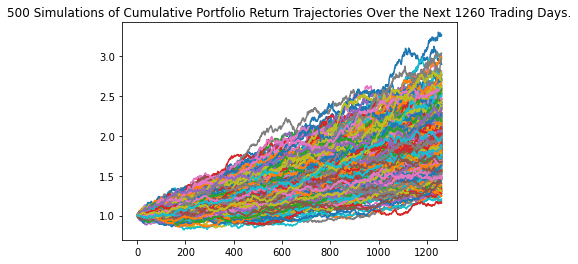

In [26]:
# Plot simulation outcomes
mc_line_plot_five = mc_dist_five.plot_simulation()

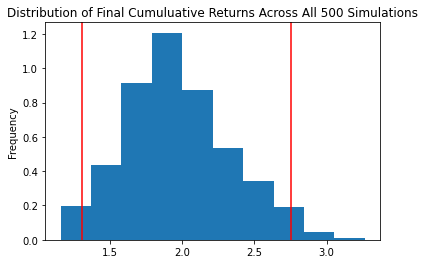

In [27]:
# Plot probability distribution and confidence intervals
mc_dist_plot_five = mc_dist_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_dist_five_summary = mc_dist_five.summarize_cumulative_return()

# Print summary statistics
print(mc_dist_five_summary)

count           500.000000
mean              1.972249
std               0.366102
min               1.160207
25%               1.714209
50%               1.927173
75%               2.196255
max               3.264119
95% CI Lower      1.309272
95% CI Upper      2.751249
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_dist_five_summary[8] * 60000, 2)
ci_upper_five = round(mc_dist_five_summary[9] * 60000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $78556.32 and $165074.94


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_dist_ten = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*10
)
mc_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2021-01-07  117.13  117.2600  117.0667  117.21  4949593          NaN  376.10   
2021-01-08  117.18  117.3428  116.9800  117.09  5580443    -0.001024  380.59   
2021-01-11  117.02  117.0500  116.8900  116.89  5047096    -0.001708  377.85   
2021-01-12  116.82  116.9900  116.6800  116.98  5103382     0.000770  378.89   
2021-01-13  117.63  117.6300  117.0800  117.36  5686592     0.003248  378.69   

                                                             
              high       low   close    volume daily_return  
2021-01-07  379.90  375.9100  379.06  58862006          NaN  
2021-01-08  381.49  377.1000  381.24  60275466     0.005751  
2021-01-11  380.58  377.7189  378.74  44814805    -0.006558  
2021-01-12  379.86  376.3600  378.81  45364896     0.000185  
2021-01-13  380.86  377.8500  379.76  38355050     0.002508

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002469,0.995647,0.990267,0.999223,1.001011,1.007306,1.002608,0.999034,1.008963,0.993097,...,1.011549,1.002478,0.999827,1.002428,0.997131,0.993995,0.999108,1.000764,1.002085,1.002451
2,1.000836,0.995193,0.984172,0.997748,0.991369,0.999828,1.000639,0.994405,1.012150,0.994717,...,1.012212,0.999689,0.995429,1.002609,1.002897,0.997680,0.999973,1.004379,1.001773,0.997677
3,1.002731,0.995023,0.992920,1.002137,0.988973,1.003880,1.009992,0.995003,1.017146,0.985363,...,1.014507,0.996476,0.991472,1.006522,1.001811,1.001015,1.001261,1.014217,1.006667,0.998290
4,1.000449,0.994112,0.995755,1.000324,0.983334,1.004469,1.012743,0.999469,1.017615,0.984673,...,1.017694,1.004143,0.993890,1.009636,0.996607,1.001212,0.993183,1.009049,1.008423,0.992064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.245003,3.559624,3.543018,3.381008,2.425841,4.748461,2.596623,3.895992,2.651535,5.781027,...,2.441991,4.925240,4.268551,3.223776,4.377967,4.159321,3.601880,5.719715,3.161727,5.697692
2517,3.234311,3.563285,3.569456,3.379160,2.413154,4.741431,2.580744,3.914118,2.636245,5.764369,...,2.452909,4.898658,4.318042,3.231871,4.405499,4.190194,3.610914,5.717273,3.197144,5.746095
2518,3.235647,3.570532,3.564843,3.398324,2.414411,4.741617,2.572098,3.900574,2.671968,5.748528,...,2.451053,4.887268,4.332962,3.232388,4.457771,4.142327,3.644930,5.726331,3.196039,5.717406
2519,3.238065,3.593406,3.568664,3.401026,2.420167,4.771066,2.553148,3.940707,2.685892,5.729949,...,2.435997,4.881243,4.309083,3.202009,4.426625,4.162919,3.629020,5.761094,3.196803,5.711528


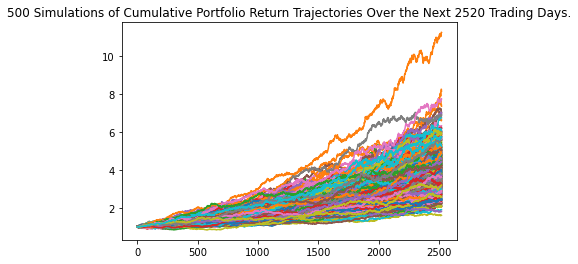

In [32]:
# Plot simulation outcomes
mc_line_plot_ten = mc_dist_ten.plot_simulation()

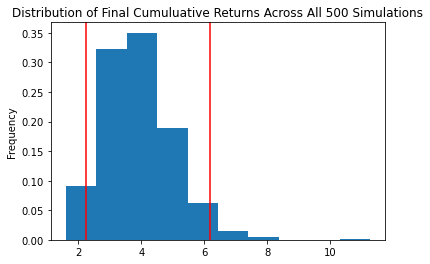

In [33]:
# Plot probability distribution and confidence intervals
mc_dist_plot_ten = mc_dist_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_dist_ten_summary = mc_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(mc_dist_ten_summary)

count           500.000000
mean              3.917372
std               1.085945
min               1.606072
25%               3.167844
50%               3.792157
75%               4.551178
max              11.257785
95% CI Lower      2.231792
95% CI Upper      6.183225
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_dist_ten_summary[8]*60000,2)
ci_upper_ten = round(mc_dist_ten_summary[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $133907.51 and $370993.5
